<a href="https://colab.research.google.com/github/judhacdc/PCVK_Genap_2023/blob/main/week_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

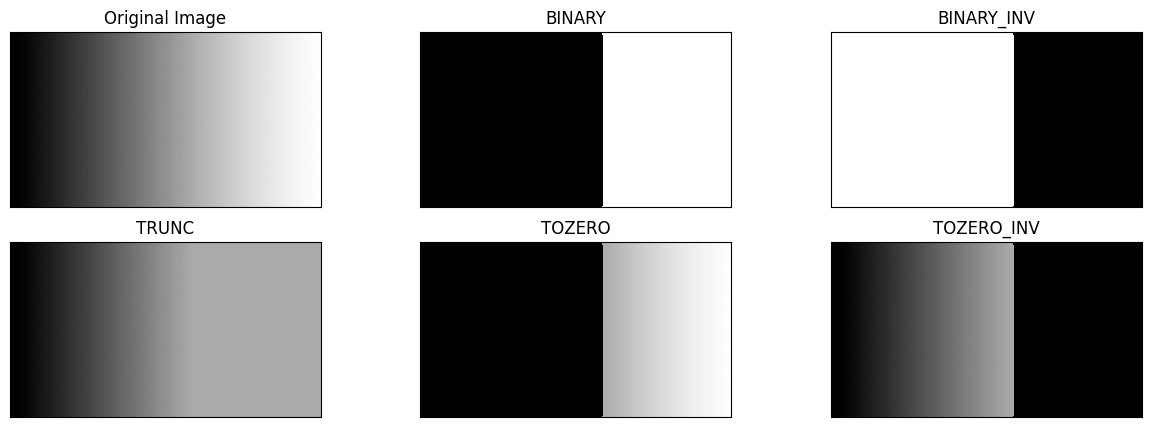

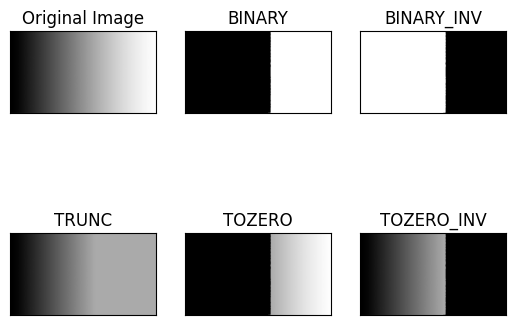

In [ ]:
# No 3
# tanpa menggunakan library
filename_1 = ('/content/drive/MyDrive/Images/gradient.jpg')
img_g = cv2.imread(filename_1, 0)
thresh1 = cv2.imread(filename_1)
thresh2 = cv2.imread(filename_1)
thresh3 = cv2.imread(filename_1)
thresh4 = cv2.imread(filename_1)
thresh5 = cv2.imread(filename_1)
thresh = 170    #nilai Threshold yang ditentukan

#1. Original Image
thresh1[img_g>thresh] = 255
thresh1[img_g<=thresh] = 0

#2. Binary threshold inverse
thresh2 = 255 - thresh1           
#3. Threshold Truncate
thresh3[img_g>thresh] = thresh
#4. Threshold Tozero
thresh4[img_g<=thresh] = 0
#5. Threshold Tozero Inverse
thresh5[img_g>thresh] = 0

titles = ['Original Image','BINARY','BINARY_INV','TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img_g, thresh1, thresh2, thresh3, thresh4, thresh5]

plt.figure(figsize = (15,5))
for i in range(len(images)):
  plt.subplot(2,3,i+1),plt.imshow(images[i],'gray', interpolation='nearest')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])

plt.show()

# menggunakan library
img_g = cv2.imread(filename_1)
ret,thresh1 = cv2.threshold(img_g,170,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img_g,170,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img_g,170,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img_g,170,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img_g,170,255,cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img_g, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

<ipython-input-17-2395ac2c7307>:19: RuntimeWarning: invalid value encountered in true_divide
  mb = sumb / wb


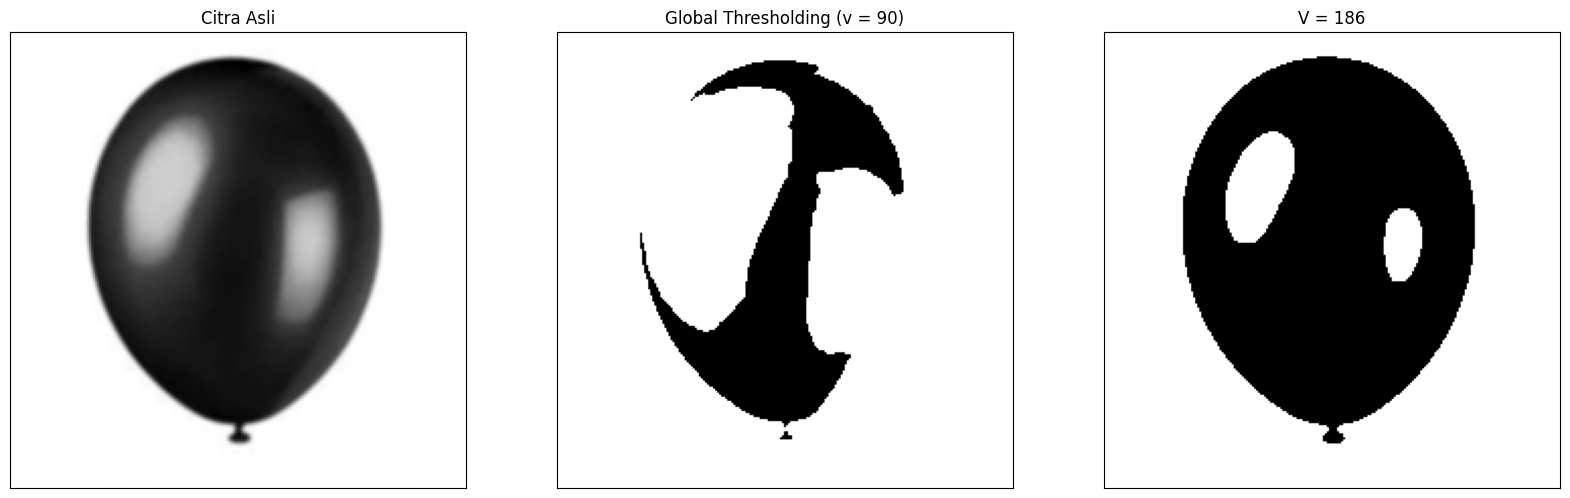

In [ ]:
ballon_img = '/content/drive/MyDrive/Images/ballon.jpg'
img = cv2.imread(ballon_img, 0)
blur = cv2.GaussianBlur(img, (5, 5), 0)

hist = cv2.calcHist([blur], [0], None, [256], [0, 256])
hist_norm = hist.ravel() / hist.max()
Q = hist_norm.cumsum()
bins = np.arange(256)
wb = 0
sumb = 0
varmax = 0
fn_min = float('inf')
thresh = -1

for i in range(0, 255):
    wb += hist[i]
    wf = (img.shape[0] * img.shape[1]) - wb
    sumb += (i * hist[i])
    mb = sumb / wb
    mf = (sumb - sumb) / wf
    betweenvar = wb * wf * (mb - mf) * (mb - mf)
    if (betweenvar > varmax):
        varmax = betweenvar
        thresh = i

x = "V = 186"
ret, th1 = cv2.threshold(blur, 90, 255, cv2.THRESH_BINARY)
ret, th2 = cv2.threshold(blur, 186, 255, cv2.THRESH_BINARY)

titles = ['Citra Asli', 'Global Thresholding (v = 90)', x]
citra3 = [blur, th1, th2]

plt.figure(figsize=(20, 15))
for i in range(len(citra3)):
    plt.subplot(1, 3, i + 1)
    plt.imshow(citra3[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.show()

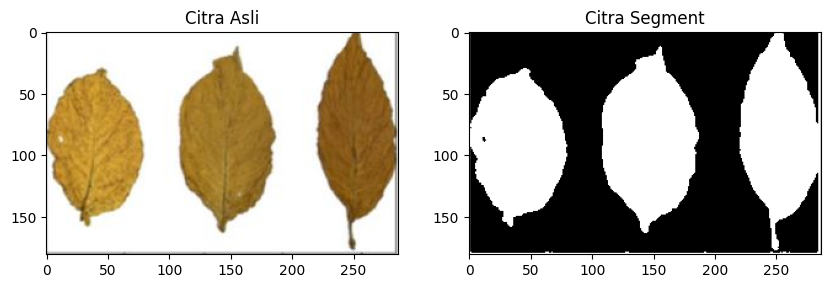

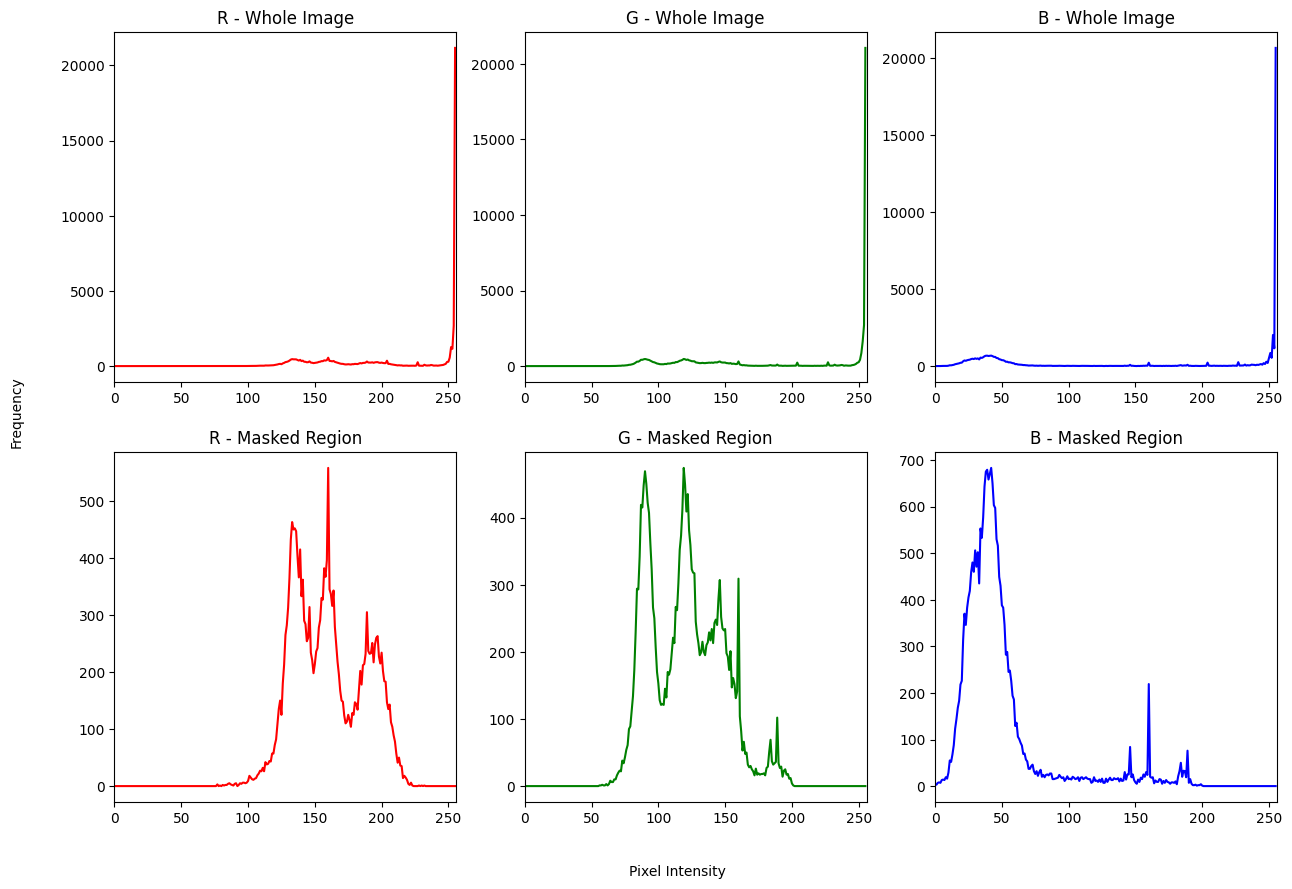

In [ ]:
# load the image in BGR format
img = cv2.imread('/content/drive/MyDrive/Images/tobacco.jpg')

# convert BGR image to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# convert RGB image to grayscale
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# apply thresholding to create a binary mask
_, mask = cv2.threshold(img_gray, 200, 255, cv2.THRESH_BINARY_INV)

# plot the original image and the binary mask
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))
axs[0].imshow(img)
axs[0].set_title('Citra Asli')
axs[1].imshow(mask, cmap='gray')
axs[1].set_title('Citra Segment')

# plot histograms for each color channel
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# iterate over each color channel (R,G,B)
for i, color in enumerate(('r', 'g', 'b')):
    # calculate histogram for the whole image
    hist_all = cv2.calcHist([img], [i], None, [256], [0, 256])

    # calculate histogram for the masked region
    hist_masked = cv2.calcHist([img], [i], mask, [256], [0, 256])

    # plot the histograms for the whole image and the masked region
    axs[0,i].plot(hist_all, color=color)
    axs[0,i].set_xlim([0, 256])
    axs[0,i].set_title(f'{color.upper()} - Whole Image')
    axs[1,i].plot(hist_masked, color=color)
    axs[1,i].set_xlim([0, 256])
    axs[1,i].set_title(f'{color.upper()} - Masked Region')

# set common labels for the histograms
fig.text(0.5, 0.04, 'Pixel Intensity', ha='center', va='center')
fig.text(0.06, 0.5, 'Frequency', ha='center', va='center', rotation='vertical')

# display the plot
plt.show()

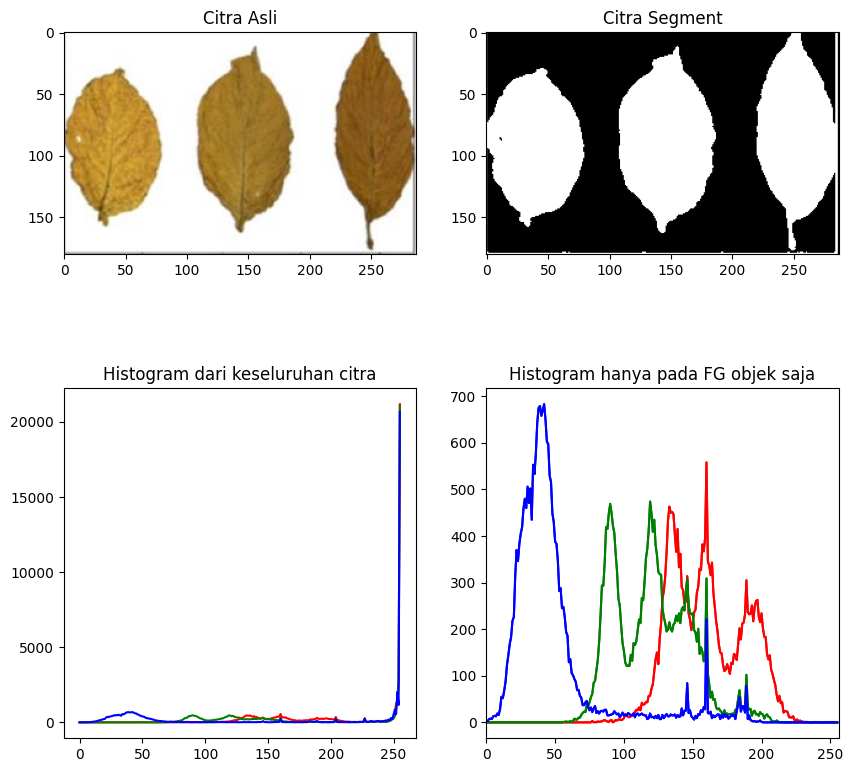

In [ ]:
# load the image in BGR format
img = cv2.imread('/content/drive/MyDrive/Images/tobacco.jpg') 
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) 
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

ret3,mask = cv2.threshold(img_gray,200,255,cv2.THRESH_BINARY_INV)

plt.figure(figsize = (10,10)) 
plt.subplot(2,2,1),plt.imshow(img) 
plt.title('Citra Asli') 
plt.subplot(2,2,2),plt.imshow(mask, 'gray') 
plt.title('Citra Segment') 
color = ('r','g','b') 
for i,col in enumerate(color):
    hist0 = cv2.calcHist([img],[i],None,[256],[0,256]) 
    plt.subplot(2,2,3),plt.plot(hist0,color = col) 
    plt.title('Histogram dari keseluruhan citra') 
    hist1 = cv2.calcHist([img],[i],mask,[256],[0,256]) 
    plt.subplot(2,2,4),plt.plot(hist1,color = col)
    plt.title('Histogram dari keseluruhan citra') 
    hist1 = cv2.calcHist([img],[i],mask,[256],[0,256]) 
    plt.subplot(2,2,4),plt.plot(hist1,color = col) 
    plt.title('Histogram hanya pada FG objek saja')
    plt.xlim([0,256]) 
plt.show()

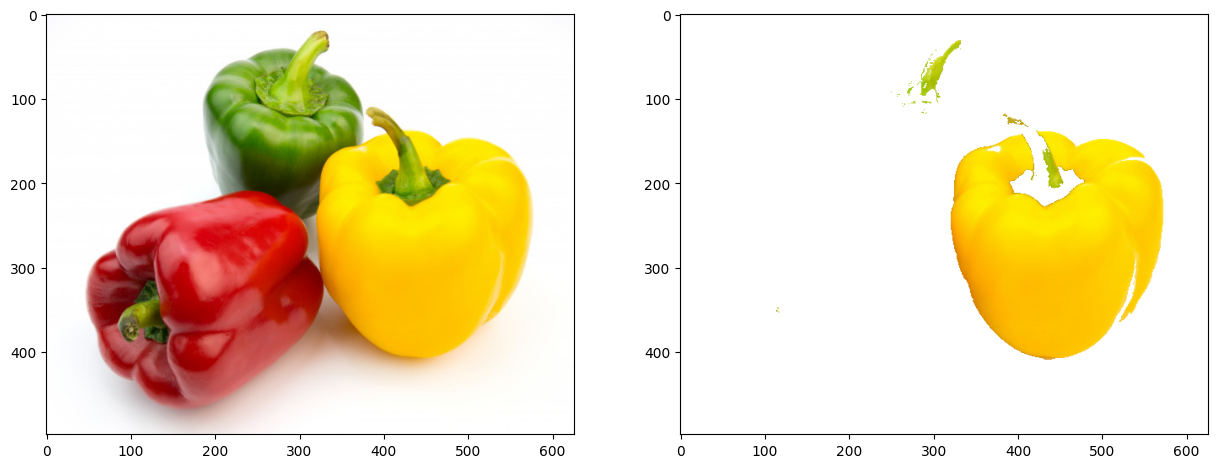

In [ ]:
filename = ('/content/drive/MyDrive/Images/peppers.jpg')

img = cv2.imread(filename) 
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

pixel_values = img.reshape((-1, 3)) 
pixel_values = np.float32(pixel_values)

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

k = 6 
_, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

yellow_cluster = np.argmax(centers[:, 0] + centers[:, 1] - 2*centers[:, 2])
labels = labels.flatten()

masked_image = np.copy(img) 
masked_image0= masked_image.reshape((-1, 3)) 
masked_image0[labels != yellow_cluster] = [255, 255, 255]
masked_image0 = masked_image0.reshape(img.shape)

plt.figure(figsize = (15,12)) 
plt.subplot(2,2,1),plt.imshow(img) 
plt.subplot(2,2,2),plt.imshow(masked_image0) 

plt.show()

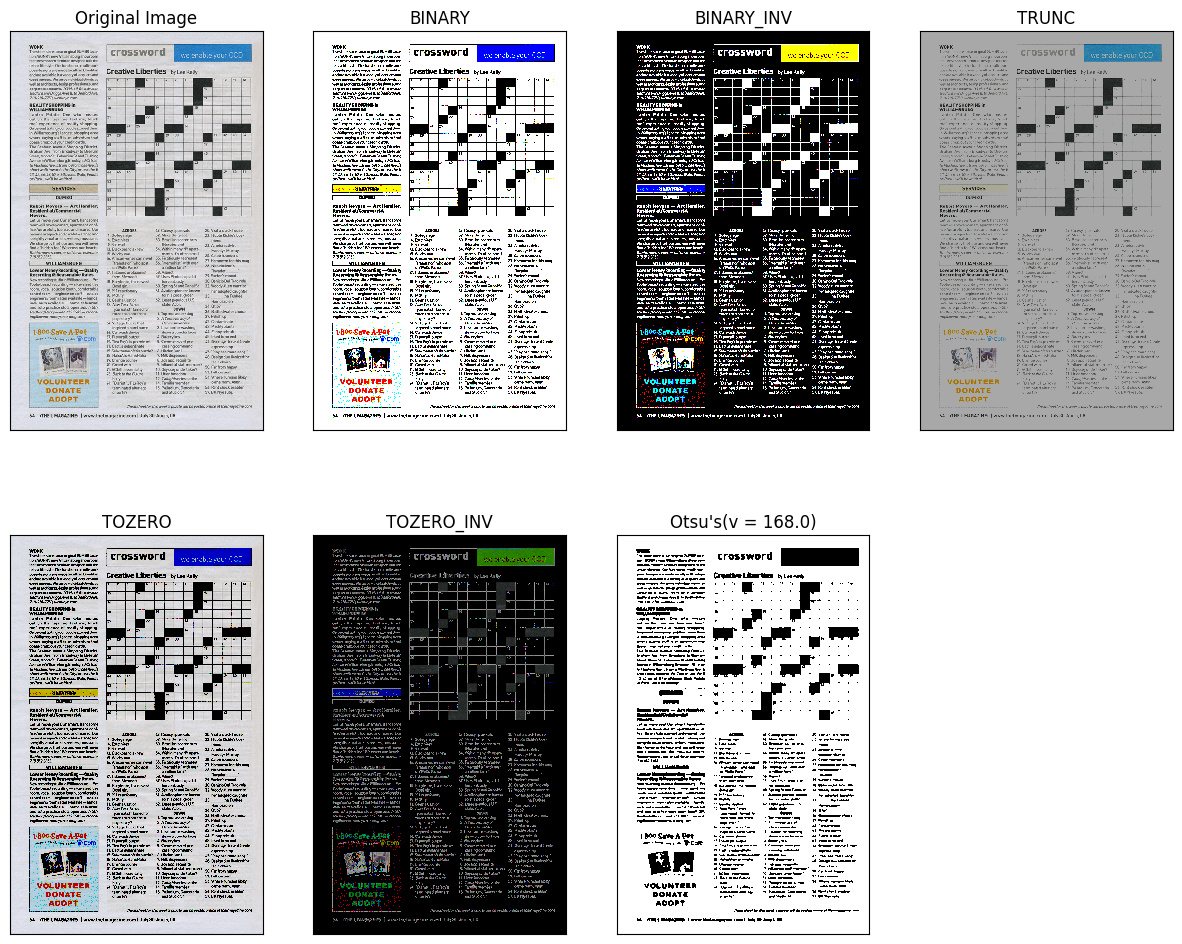

In [ ]:
img = cv2.imread('/content/drive/MyDrive/Images/crossword.jpg')
img_gray= cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
blur = cv2.GaussianBlur(img_gray,(5,5),0)
thresh = 168

ret, thresh1 = cv2.threshold(img, thresh,255,cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(img, thresh,255,cv2.THRESH_BINARY_INV)
ret, thresh3 = cv2.threshold(img, thresh,255,cv2.THRESH_TRUNC)
ret, thresh4 = cv2.threshold(img, thresh,255,cv2.THRESH_TOZERO)
ret, thresh5 = cv2.threshold(img, thresh,255,cv2.THRESH_TOZERO_INV)
ret2, th2 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

x = ("Otsu's(v = ") + str(ret2)+")"
titles = ['Original Image', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV',x]
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5,th2]

plt.figure(figsize = (15,12))

for i in range(len(images)):
  plt.subplot(2,4,i+1), plt.imshow(images[i], 'gray', interpolation = 'nearest')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])
plt.show()